In [8]:

#You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

#(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

#(2) After removing outliers in step 1, you get a new dataframe.

#(3) On step(2) dataframe, use 4 standard deviation to remove outliers

#(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

#(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

url="https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/2_outliers_z_score/Exercise/bhp.csv"
df=pd.read_csv(url)
df


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [14]:
#(1) Primer punto: primero vamos a observar cuales son los cuantiles
Min_limite, Max_limite = df.price_per_sqft.quantile([0.001,0.999])
Min_limite, Max_limite

(1366.184, 50959.36200000099)

In [16]:
#(1.1) Vamos a crear un nuevo dataframe donde ya no esten los valores que mencionan en los cuantiles:Los menores del Min
#y los que sobrepasen en max cuantil

df2 = df[(df.price_per_sqft>Min_limite) & (df.price_per_sqft<Max_limite)]
df2


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [25]:
# Punto 3, en base al dataset creado ahora vamos a usar Standar con un valor de 4 
# Punto 4, graficar su respectivo histograma y su curva 

limite_superior = df2.price_per_sqft.mean() +  4*df2.price_per_sqft.std()
limite_inferior = df2.price_per_sqft.mean() -  4*df2.price_per_sqft.std()

limite_superior,limite_inferior

(23227.73653589429, -9900.429065502549)

In [27]:
df3 = df2[(df2.price_per_sqft<limite_superior) & (df.price_per_sqft>limite_inferior)]
df3

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


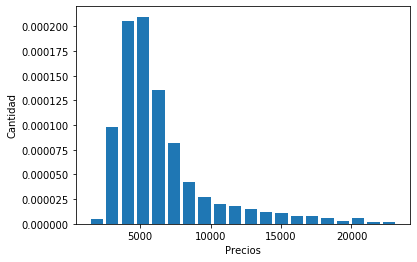

In [28]:
plt.hist(df3.price_per_sqft, bins=20,rwidth=0.8, density=True )
plt.xlabel("Precios")
plt.ylabel("Cantidad")
plt.show()

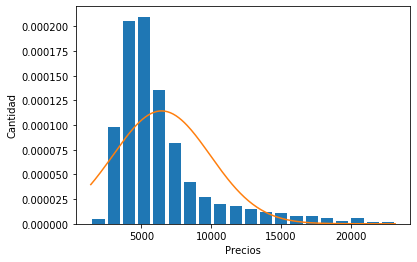

In [32]:
#ahora con la linea 
from scipy.stats import norm 
plt.hist(df3.price_per_sqft, bins=20,rwidth=0.8, density=True )
plt.xlabel("Precios")
plt.ylabel("Cantidad")
rng = np.arange(df3.price_per_sqft.min(), df3.price_per_sqft.max(),100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(),df3.price_per_sqft.std()))


In [36]:
#AHORA HAREMOS EL CUARTO PUNTO POR MEDIO DEL DATAFRAME 2 CON EL USO DEL METODO Z-SCORE

#recordar que este se hace por medio de la formula

df2["zscore"] = ((df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std())
df2

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [38]:
#En el ejercicio se nos pide que se eliminen para 4 zcore

df4 = df2[(df2.zscore<4) & (df2.zscore>-4)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967
